#  USED  CAR DATA ANALYSIS

In [2]:
import pyspark

In [3]:
from pyspark.sql import SparkSession
from pyspark.sql import functions
import sys

In [4]:
spark = SparkSession.builder.appName('CarAnalysis').master('local').getOrCreate()

In [5]:
input_path=r"C:\Users\Shama Kiran\Desktop\Used car dataset\used_cars_data.csv"

In [6]:
df=spark.read.csv(input_path,header=True)

## Checking and exploring the columns 

In [7]:
df.columns

['vin',
 'back_legroom',
 'bed',
 'bed_height',
 'bed_length',
 'body_type',
 'cabin',
 'city',
 'city_fuel_economy',
 'combine_fuel_economy',
 'daysonmarket',
 'dealer_zip',
 'description',
 'engine_cylinders',
 'engine_displacement',
 'engine_type',
 'exterior_color',
 'fleet',
 'frame_damaged',
 'franchise_dealer',
 'franchise_make',
 'front_legroom',
 'fuel_tank_volume',
 'fuel_type',
 'has_accidents',
 'height',
 'highway_fuel_economy',
 'horsepower',
 'interior_color',
 'isCab',
 'is_certified',
 'is_cpo',
 'is_new',
 'is_oemcpo',
 'latitude',
 'length',
 'listed_date',
 'listing_color',
 'listing_id',
 'longitude',
 'main_picture_url',
 'major_options',
 'make_name',
 'maximum_seating',
 'mileage',
 'model_name',
 'owner_count',
 'power',
 'price',
 'salvage',
 'savings_amount',
 'seller_rating',
 'sp_id',
 'sp_name',
 'theft_title',
 'torque',
 'transmission',
 'transmission_display',
 'trimId',
 'trim_name',
 'vehicle_damage_category',
 'wheel_system',
 'wheel_system_display',

In [8]:
rows=df.count()

In [9]:
print(rows)

3000507


In [10]:
df.head()

Row(vin='ZACNJABB5KPJ92081', back_legroom='35.1 in', bed=None, bed_height=None, bed_length=None, body_type='SUV / Crossover', cabin=None, city='Bayamon', city_fuel_economy=None, combine_fuel_economy=None, daysonmarket='522', dealer_zip='00960', description="[!@@Additional Info@@!]Engine: 2.4L I4 ZERO EVAP M-AIR,Full Size Temporary Use Spare Tire,Manufacturer's Statement of Origin,Quick Order Package 2XB,Tires: 215/60R17 BSW AS Touring,Transmission: 9-Speed 948TE Automatic,Wheels: 17' x 7.0' Aluminum", engine_cylinders='I4', engine_displacement='1300.0', engine_type='I4', exterior_color='Solar Yellow', fleet=None, frame_damaged=None, franchise_dealer='True', franchise_make='Jeep', front_legroom='41.2 in', fuel_tank_volume='12.7 gal', fuel_type='Gasoline', has_accidents=None, height='66.5 in', highway_fuel_economy=None, horsepower='177.0', interior_color='Black', isCab=None, is_certified=None, is_cpo=None, is_new='True', is_oemcpo=None, latitude='18.3988', length='166.6 in', listed_date=

## TASK 1:Data Preprocessing: Calculate the percentage of null values for each column and eliminate columns containing over 20% null values.

In [11]:
from pyspark.sql.functions import col,count,when,isnan
total_rows=df.count()
null_count_of_columns=df.select([count(when(col(i).isNull()|isnan(i),i)).alias(i) for i in df.columns]).collect()[0]
null_percentages={col_name:null_count/total_rows*100 for col_name,null_count in zip(df.columns,null_count_of_columns)}
threshold=20
columns_to_drop = [col for col,null_percentage in null_percentages.items() if null_percentage>threshold]
cleaned_df = df.drop(*columns_to_drop)
print(f"Columns with more than {threshold}% null values:")
print("\n".join(columns_to_drop))
print("\nNull value percentage for remaining columns:")
for col, null_pct in null_percentages.items():
    if col not in columns_to_drop:
       print(f"{col}: {null_pct:.2f}%")

Columns with more than 20% null values:
bed
bed_height
bed_length
cabin
combine_fuel_economy
fleet
frame_damaged
has_accidents
isCab
is_certified
is_cpo
is_oemcpo
owner_count
salvage
theft_title
vehicle_damage_category

Null value percentage for remaining columns:
vin: 0.00%
back_legroom: 5.32%
body_type: 0.46%
city: 0.01%
city_fuel_economy: 16.39%
daysonmarket: 0.01%
dealer_zip: 0.01%
description: 2.61%
engine_cylinders: 2.39%
engine_displacement: 3.92%
engine_type: 2.45%
exterior_color: 0.13%
franchise_dealer: 0.49%
franchise_make: 17.02%
front_legroom: 4.65%
fuel_tank_volume: 4.50%
fuel_type: 2.64%
height: 4.16%
highway_fuel_economy: 10.57%
horsepower: 4.75%
interior_color: 0.89%
is_new: 2.16%
latitude: 3.20%
length: 6.37%
listed_date: 2.49%
listing_color: 2.04%
listing_id: 1.53%
longitude: 1.19%
main_picture_url: 8.14%
major_options: 6.95%
make_name: 0.94%
maximum_seating: 4.51%
mileage: 2.38%
model_name: 0.83%
power: 10.92%
price: 1.02%
savings_amount: 1.38%
seller_rating: 2.30%
s

In [12]:
cleaned_df.columns

['vin',
 'back_legroom',
 'body_type',
 'city',
 'city_fuel_economy',
 'daysonmarket',
 'dealer_zip',
 'description',
 'engine_cylinders',
 'engine_displacement',
 'engine_type',
 'exterior_color',
 'franchise_dealer',
 'franchise_make',
 'front_legroom',
 'fuel_tank_volume',
 'fuel_type',
 'height',
 'highway_fuel_economy',
 'horsepower',
 'interior_color',
 'is_new',
 'latitude',
 'length',
 'listed_date',
 'listing_color',
 'listing_id',
 'longitude',
 'main_picture_url',
 'major_options',
 'make_name',
 'maximum_seating',
 'mileage',
 'model_name',
 'power',
 'price',
 'savings_amount',
 'seller_rating',
 'sp_id',
 'sp_name',
 'torque',
 'transmission',
 'transmission_display',
 'trimId',
 'trim_name',
 'wheel_system',
 'wheel_system_display',
 'wheelbase',
 'width',
 'year']

## EDA : Determine the most common fuel type among the listed vehicles.

## Casting the type of fuel_type as string and showing it in descending order

In [13]:
from pyspark.sql.functions import col
reqd_col="fuel_type"
cleaned1_df = cleaned_df.withColumn("fuel_type", cleaned_df["fuel_type"].cast("string"))
reqd_col_freq = cleaned1_df.filter(col(reqd_col).isNotNull()).groupBy(reqd_col).count().orderBy("count", ascending=False)
reqd_col_freq.show(truncate=0)
most_common_fuel_type=reqd_col_freq.select(reqd_col).first()[0]
print(f"The most common fuel type is {most_common_fuel_type}")

+-------------------------------------+-------+
|fuel_type                            |count  |
+-------------------------------------+-------+
|Gasoline                             |1561374|
|Flex Fuel Vehicle                    |86325  |
|Hybrid                               |55165  |
|True                                 |30395  |
|4-Wheel Disc Brakes                  |24408  |
|Diesel                               |24185  |
|ABS brakes                           |23235  |
|False                                |21159  |
|Air Conditioning                     |19135  |
|Tachometer                           |14911  |
|Biodiesel                            |12975  |
|Front Center Armrest                 |11527  |
|Steering wheel mounted audio controls|11490  |
|Electronic Stability Control         |11360  |
|Electric                             |10530  |
|Spoiler                              |9783   |
|Front Bucket Seats                   |9460   |
|AM/FM radio                          |8

## EDA: Calculate the average horsepower of vehicles with the most common fuel type.

In [14]:
cleaned1_df.select('horsepower').distinct().show()

+--------------------+
|          horsepower|
+--------------------+
|               247.0|
|               151.0|
| Rear Power Liftgate|
|Cruise Control w/...|
|             84.8 in|
|  Sport Line Package|
|AM/FM/CD/MP3 Audi...|
| Delete Spray In ...|
|LUXURY PACKAGE -i...|
|PHYTONIC BLUE MET...|
|               102.0|
|     Aurora Black Pe|
|Body Color Liftga...|
|               602.0|
|       Trip computer|
|               302.0|
|               360.0|
|Gloss Black Door ...|
| 8-way power adju...|
|         Center Line|
+--------------------+
only showing top 20 rows



## Casting horsepower's type as float

In [15]:
from pyspark.sql import functions as F
from pyspark.sql.functions import col, isnan, when, avg
cleaned_hp = cleaned1_df.withColumn( 'horsepower', when(col('horsepower').cast('float').isNull(), None).otherwise(col('horsepower').cast('float')))

## Filtering out the out of range values using interquartile formula

In [16]:
from pyspark.sql import functions as F
quartiles=cleaned_hp.approxQuantile('horsepower',[0.25,0.75],0.01)
q1=quartiles[0]
q3=quartiles[1]
iqr=q3-q1
lower_bound=q1-1.5*iqr
upper_bound=q3+1.5*iqr
cleaned_hp = cleaned_hp.filter((col('horsepower') >= lower_bound) & (col('horsepower') <= upper_bound))

In [17]:
common_fuel_df=cleaned_hp.filter(cleaned_hp[reqd_col]==most_common_fuel_type)
common_fuel_num_hp= common_fuel_df.filter(col("horsepower").isNotNull())
avg_hp = common_fuel_num_hp.agg(avg('horsepower')).first()[0]
print(f"The average of horsepower of vehicles with the most common fuel type is {avg_hp:.3f}")

The average of horsepower of vehicles with the most common fuel type is 232.682


In [18]:
cleaned_hp.select('horsepower').show()

+----------+
|horsepower|
+----------+
|     177.0|
|     246.0|
|     305.0|
|     340.0|
|     246.0|
|     247.0|
|     186.0|
|     247.0|
|     246.0|
|     296.0|
|     237.0|
|     246.0|
|     320.0|
|     247.0|
|     186.0|
|     186.0|
|     246.0|
|     247.0|
|     247.0|
|     246.0|
+----------+
only showing top 20 rows



## EDA :  Explore the distribution of city_fuel_economy across different cities.

## Exploring the city fuel economy column

In [19]:
from pyspark.sql.functions import col, count, isnan, when
null_count_cfe = cleaned_df.select(count(when(isnan('fuel_type') | col('fuel_type').isNull(), 'city_fuel_economy'))).collect()[0][0]
print(f"Null value count for 'city_fuel_economy' column: {null_count_cfe}")

Null value count for 'city_fuel_economy' column: 79067


## Exploring the city column

In [20]:
city_grp=cleaned_df.groupBy('city')
city_count=city_grp.count()
city_count.show()

+------------------+-----+
|              city|count|
+------------------+-----+
|       Springfield|10761|
|          Oakhurst|  329|
|     Lawrenceville| 1847|
|        Plainfield| 2366|
|         Levittown|  851|
|      Saddle Brook|   16|
|           Wantage|   49|
|        Douglaston|  224|
|       Lindenhurst|  198|
|          Lynbrook|  428|
|         Bay Shore| 1104|
|         Fair Lawn|  472|
|     Windsor Locks|  164|
|        Woodbridge| 5034|
|Huntington Station| 1123|
|      White Plains| 1299|
|        Manchester| 5535|
|           Trenton| 1382|
|         Smithtown|  625|
|         Riverdale| 1053|
+------------------+-----+
only showing top 20 rows



In [21]:
cleaned_df.printSchema()

root
 |-- vin: string (nullable = true)
 |-- back_legroom: string (nullable = true)
 |-- body_type: string (nullable = true)
 |-- city: string (nullable = true)
 |-- city_fuel_economy: string (nullable = true)
 |-- daysonmarket: string (nullable = true)
 |-- dealer_zip: string (nullable = true)
 |-- description: string (nullable = true)
 |-- engine_cylinders: string (nullable = true)
 |-- engine_displacement: string (nullable = true)
 |-- engine_type: string (nullable = true)
 |-- exterior_color: string (nullable = true)
 |-- franchise_dealer: string (nullable = true)
 |-- franchise_make: string (nullable = true)
 |-- front_legroom: string (nullable = true)
 |-- fuel_tank_volume: string (nullable = true)
 |-- fuel_type: string (nullable = true)
 |-- height: string (nullable = true)
 |-- highway_fuel_economy: string (nullable = true)
 |-- horsepower: string (nullable = true)
 |-- interior_color: string (nullable = true)
 |-- is_new: string (nullable = true)
 |-- latitude: string (nullab

In [22]:
cleaned_df.select('city').distinct().show()

+------------------+
|              city|
+------------------+
|       Springfield|
|          Oakhurst|
|     Lawrenceville|
|        Plainfield|
|         Levittown|
|      Saddle Brook|
|           Wantage|
|        Douglaston|
|       Lindenhurst|
|          Lynbrook|
|         Bay Shore|
|         Fair Lawn|
|     Windsor Locks|
|        Woodbridge|
|Huntington Station|
|      White Plains|
|        Manchester|
|           Trenton|
|         Smithtown|
|         Riverdale|
+------------------+
only showing top 20 rows



## Cleaning the city_fuel_economy column

In [23]:
cleaned_df.select('city_fuel_economy').show()

+-----------------+
|city_fuel_economy|
+-----------------+
|             NULL|
|             NULL|
|             17.0|
|             NULL|
|             NULL|
|             NULL|
|             NULL|
|             NULL|
|             NULL|
|             NULL|
|             NULL|
|             NULL|
|             22.0|
|             NULL|
|             NULL|
|             NULL|
|             NULL|
|             NULL|
|             NULL|
|             NULL|
+-----------------+
only showing top 20 rows



In [24]:
filtered_df=cleaned_df.select('city','city_fuel_economy')
filtered_df=filtered_df.dropna(subset=['city_fuel_economy'])
filtered_df.show()

+---------+-----------------+
|     city|city_fuel_economy|
+---------+-----------------+
| Guaynabo|             17.0|
| Guaynabo|             22.0|
|Bay Shore|             27.0|
|    Bronx|             18.0|
|Bay Shore|             18.0|
|Bay Shore|             15.0|
|Bay Shore|             18.0|
|    Bronx|             20.0|
|    Bronx|             27.0|
|    Bronx|             18.0|
|Bay Shore|             18.0|
|Bay Shore|             24.0|
|    Bronx|             23.0|
|    Bronx|             18.0|
|Bay Shore|             18.0|
|Bay Shore|             24.0|
|    Bronx|             16.0|
|    Bronx|             18.0|
|    Bronx|             18.0|
|    Bronx|             19.0|
+---------+-----------------+
only showing top 20 rows



In [25]:
filtered_df.printSchema()

root
 |-- city: string (nullable = true)
 |-- city_fuel_economy: string (nullable = true)



## Converting the type of city_fuel_economy from string to double and replacing special characters

In [26]:
from pyspark.sql.functions import col,trim,regexp_replace,when,isnan
filtered_df=filtered_df.withColumn('city_fuel_economy',trim(regexp_replace('city_fuel_economy',r'[^0-9\.]','')))
cleaned_fuel_economy=when(col('city_fuel_economy')!='',col('city_fuel_economy').cast('double')).otherwise(None)
filtered_df=filtered_df.withColumn('city_fuel_economy',cleaned_fuel_economy)
filtered_df=filtered_df.dropna(subset=['city_fuel_economy'])
filtered_df.head()

Row(city='Guaynabo', city_fuel_economy=17.0)

In [27]:
filtered_df.select('city_fuel_economy').distinct().show()

+-----------------+
|city_fuel_economy|
+-----------------+
|             70.0|
|            124.0|
|            175.4|
|   177.5255751781|
|       455614.344|
|             88.0|
|             49.0|
|            101.0|
|             29.0|
|             64.0|
|             47.0|
|             42.0|
|             44.0|
|             35.0|
|             62.0|
|             18.0|
|            120.0|
|             39.0|
|             94.0|
|            114.0|
+-----------------+
only showing top 20 rows



## Removing outliers from city_fuel_economy

In [28]:
from pyspark.sql import functions as F
from pyspark.sql.functions import col
quartiles = filtered_df.stat.approxQuantile('city_fuel_economy', [0.25, 0.75], 0.01) 
q1 = quartiles[0]
q3 = quartiles[1]
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
filtered_df = filtered_df.filter((col('city_fuel_economy') >= lower_bound) & (col('city_fuel_economy') <= upper_bound))

In [29]:
min_value=filtered_df.agg(F.min('city_fuel_economy')).collect()[0][0]
max_value=filtered_df.agg(F.max('city_fuel_economy')).collect()[0][0]
print("Minimum value after filtering:",min_value)
print("Maximum value after filtering:",max_value)

Minimum value after filtering: 6.0
Maximum value after filtering: 38.0


## Cleaning city column

In [30]:
from pyspark.sql.functions import col
reqd_col="city"
filtered_df =filtered_df.withColumn("city",filtered_df["city"].cast("string"))
reqd_col_freq = df.filter(col(reqd_col).isNotNull()).groupBy(reqd_col).count().orderBy("count",ascending=False)
reqd_col_freq.show(truncate=0)

+-------------+-----+
|city         |count|
+-------------+-----+
|Houston      |43777|
|San Antonio  |24947|
|Columbus     |18333|
|Miami        |18198|
|Jacksonville |16837|
|Las Vegas    |16396|
|Tampa        |15353|
|Phoenix      |14791|
|Dallas       |14641|
|Orlando      |14499|
|Austin       |14220|
|Columbia     |12778|
|Indianapolis |12317|
|Cincinnati   |12212|
|Charlotte    |11189|
|Tucson       |11028|
|Denver       |10921|
|Springfield  |10761|
|Oklahoma City|10459|
|El Paso      |9719 |
+-------------+-----+
only showing top 20 rows



In [31]:
filtered_df.select('city').show()

+---------+
|     city|
+---------+
| Guaynabo|
| Guaynabo|
|Bay Shore|
|    Bronx|
|Bay Shore|
|Bay Shore|
|Bay Shore|
|    Bronx|
|    Bronx|
|    Bronx|
|Bay Shore|
|Bay Shore|
|    Bronx|
|    Bronx|
|Bay Shore|
|Bay Shore|
|    Bronx|
|    Bronx|
|    Bronx|
|    Bronx|
+---------+
only showing top 20 rows



In [32]:
from pyspark.sql import functions as F
city_fuel_economy=filtered_df.groupBy('city').agg(F.mean('city_fuel_economy').alias('avg_fuel_economy'))
city_fuel_economy.select('avg_fuel_economy').describe().show()

+-------+------------------+
|summary|  avg_fuel_economy|
+-------+------------------+
|  count|              4667|
|   mean|  20.5099140524143|
| stddev|2.0955218763674077|
|    min|               6.0|
|    max|              30.0|
+-------+------------------+



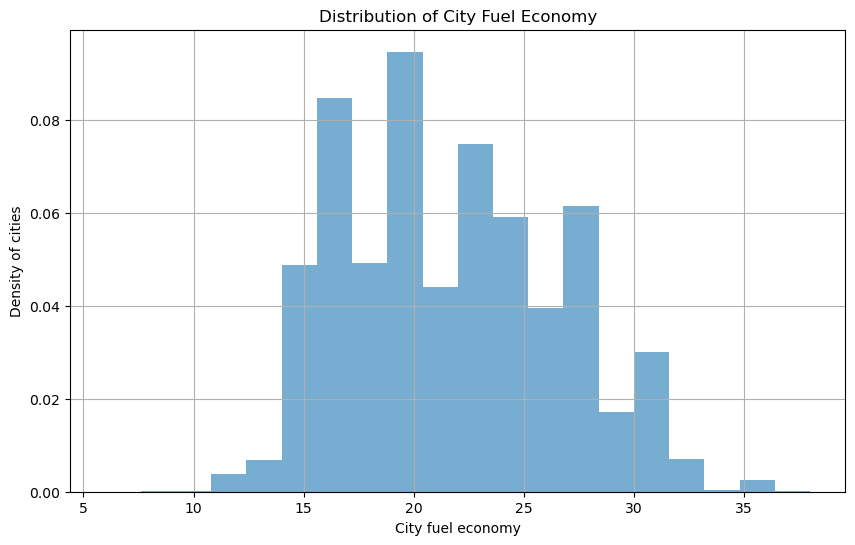

In [33]:
city_fuel_economy_pd=filtered_df.select('city_fuel_economy').toPandas()
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
city_fuel_economy_pd['city_fuel_economy'].hist(bins=20,density=True,alpha=0.6)
plt.title('Distribution of City Fuel Economy')
plt.xlabel('City fuel economy')
plt.ylabel('Density of cities')
plt.show()

## EDA : Analyze the distribution of vehicle types in the dataset.

In [34]:
from pyspark.sql import functions as F
body_type_distribution = cleaned_df.groupBy('body_type').agg(F.count('*').alias('count'))
body_type_distribution=body_type_distribution.orderBy(F.desc('count'))
body_type_distribution.show()

+--------------------+-------+
|           body_type|  count|
+--------------------+-------+
|     SUV / Crossover|1416402|
|               Sedan| 742036|
|        Pickup Truck| 474595|
|           Hatchback|  88374|
|             Minivan|  79802|
|               Coupe|  71607|
|                 Van|  47166|
|               Wagon|  40505|
|         Convertible|  26010|
|                NULL|  13918|
|               False|     16|
|        Brake Assist|      8|
| DOHC with Variab...|      3|
|              5000.0|      2|
|               White|      2|
|                True|      2|
|    'Premium Wheels'|      2|
|                  SD|      2|
| we are not respo...|      2|
|      'Heated Seats'|      1|
+--------------------+-------+
only showing top 20 rows



## Filtering and keeping only the valid body types and ordering them in descending order by count 

In [35]:
cleaned_body_type_df=cleaned_df.filter(cleaned_df['body_type'].isin(['SUV / Crossover','Sedan','Pickup Truck','Minivan','Hatchback','Coupe','Wagon','Convertible','Van']))
body_type_distribution = cleaned_body_type_df.groupBy('body_type').agg(F.count('*').alias('count'))
body_type_distribution=body_type_distribution.orderBy(F.desc('count'))
body_type_distribution.show()

+---------------+-------+
|      body_type|  count|
+---------------+-------+
|SUV / Crossover|1416402|
|          Sedan| 742036|
|   Pickup Truck| 474595|
|      Hatchback|  88374|
|        Minivan|  79802|
|          Coupe|  71607|
|            Van|  47166|
|          Wagon|  40505|
|    Convertible|  26010|
+---------------+-------+



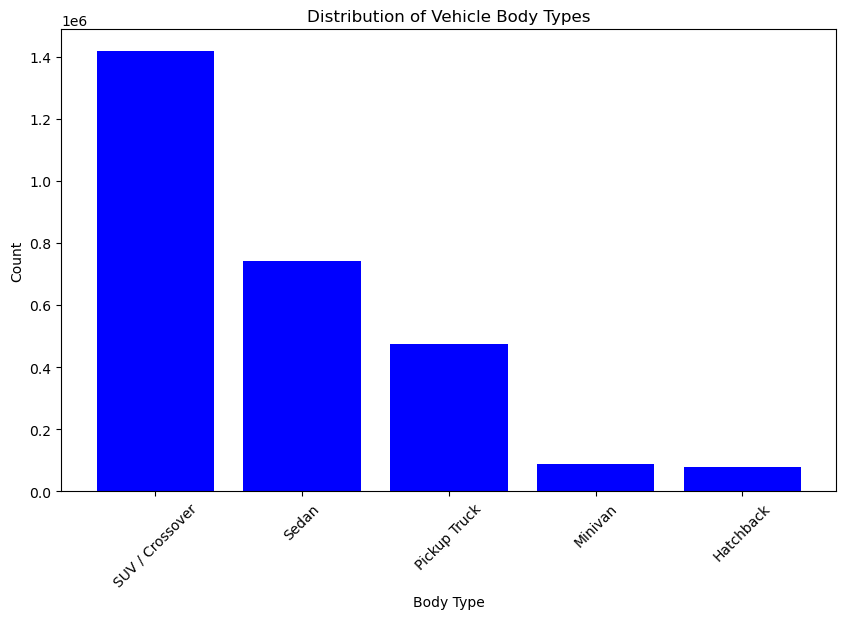

In [36]:
import matplotlib.pyplot as plt
body_types = ['SUV / Crossover', 'Sedan', 'Pickup Truck', 'Minivan', 'Hatchback']
counts = [1416402, 742036, 474595, 88374, 79802]
plt.figure(figsize=(10, 6))
plt.bar(body_types, counts, color='blue')
plt.xlabel('Body Type')
plt.ylabel('Count')
plt.title('Distribution of Vehicle Body Types')
plt.xticks(rotation=45)
plt.tight_layout
plt.show()

## ADVANCED ANALYSIS : Examine the price trend over the years for the top 5 most popular body_types and visualize it.

In [37]:
cleaned_body_type1_df = cleaned_df.filter(cleaned_df['body_type'].isin(['SUV / Crossover', 'Sedan', 'Pickup Truck', 'Minivan', 'Hatchback']))
cleaned_body_type1_df.select('body_type').show()

+---------------+
|      body_type|
+---------------+
|SUV / Crossover|
|SUV / Crossover|
|          Sedan|
|SUV / Crossover|
|SUV / Crossover|
|SUV / Crossover|
|          Sedan|
|SUV / Crossover|
|SUV / Crossover|
|SUV / Crossover|
|SUV / Crossover|
|          Sedan|
|SUV / Crossover|
|          Sedan|
|          Sedan|
|SUV / Crossover|
|SUV / Crossover|
|SUV / Crossover|
|SUV / Crossover|
|          Sedan|
+---------------+
only showing top 20 rows



In [38]:
cleaned_body_type1_df.select('price').show()

+-------+
|  price|
+-------+
|23141.0|
|46500.0|
|46995.0|
|67430.0|
|48880.0|
|66903.0|
|23695.0|
|68520.0|
|51245.0|
|84399.0|
|51885.0|
|58995.0|
|68725.0|
|23695.0|
|23695.0|
|52275.0|
|68760.0|
|68760.0|
|53770.0|
|23695.0|
+-------+
only showing top 20 rows



## Exploring the random values in the year column

In [39]:
cleaned_body_type1_df.select('year').distinct().show()

+--------------------+
|                year|
+--------------------+
|       Trip computer|
|Bright Rotary Shi...|
|              SV AWD|
|            14.8 gal|
|4-Speed Automatic...|
|            112.2 in|
|              t75195|
|             LTZ FWD|
|                 1.0|
|Tire pressure mon...|
|    Traction control|
|              t43978|
|SiriusXM Traffic ...|
|Chrome/Leather Wr...|
|          Volkswagen|
|https://static.ca...|
|       USB Host Flip|
|             39054.0|
|   Stability control|
|              t59702|
+--------------------+
only showing top 20 rows



In [40]:
cleaned_body_type1_df.select('year').show()

+----+
|year|
+----+
|2019|
|2020|
|2016|
|2020|
|2020|
|2020|
|2019|
|2020|
|2020|
|2020|
|2020|
|2016|
|2020|
|2019|
|2019|
|2020|
|2020|
|2020|
|2020|
|2019|
+----+
only showing top 20 rows



In [41]:
from pyspark.sql.functions import col, count, isnan, when
total_rows = cleaned_body_type1_df.count()
null_count_year = cleaned_body_type1_df.select(count(when(isnan('year') | col('year').isNull(), 'year'))).collect()[0][0]
null_percentage_year = null_count_year / total_rows * 100
print(f"Null value percentage for 'year': {null_percentage_year:.2f}%")

Null value percentage for 'year': 1.72%


## Dropping null values from year

In [42]:
from pyspark.sql.types import IntegerType
cleaned_body_type1_df=cleaned_body_type1_df.dropna(subset=['year'])
cleaned_body_type1_df=cleaned_body_type1_df.withColumn("year",col("year").cast(IntegerType()))

In [43]:
 cleaned_body_type1_df.select('year').distinct().show()

+---------+
|     year|
+---------+
|     1990|
|    56387|
|      -73|
|       34|
|     2003|
|     2342|
|     2007|
|267916481|
|     2018|
|      300|
|     2015|
|       26|
|    38155|
|      271|
|276719348|
|     1955|
|     2006|
|     3500|
|   186126|
|280909300|
+---------+
only showing top 20 rows



## Filtering out the years between 2011 and 2021

In [44]:
cleaned_body_type1_df = cleaned_body_type1_df.filter((col("year") > 2011) & (col("year") <= 2021))
cleaned_body_type1_df.select('year').distinct().show()

+----+
|year|
+----+
|2018|
|2015|
|2013|
|2014|
|2019|
|2020|
|2012|
|2016|
|2017|
|2021|
+----+



In [45]:
from pyspark.sql import functions as F
yeardist = cleaned_body_type1_df.groupBy('year').agg(F.count('*').alias('count'))
yeardist = yeardist.orderBy(F.desc('count'))
yeardist.show(100)

+----+------+
|year| count|
+----+------+
|2020|700887|
|2017|191279|
|2019|151646|
|2018|114512|
|2021|104485|
|2016| 73091|
|2015| 58003|
|2014| 49166|
|2013| 45896|
|2012| 36249|
+----+------+



## Exploring price column

In [46]:
cleaned_body_type1_df.select('price').distinct().show()

+-------+
|  price|
+-------+
|46470.0|
|12891.0|
|40105.0|
|32267.0|
|43185.0|
|42520.0|
|37975.0|
|55670.0|
|12985.0|
|73200.0|
|25885.0|
|13178.0|
|50176.0|
|36249.0|
|59122.0|
|52074.0|
|52195.0|
|35680.0|
|36230.0|
|51925.0|
+-------+
only showing top 20 rows



In [47]:
from pyspark.sql.functions import col, count, isnan, when
total_rows = cleaned_body_type1_df.count()
null_count_price = cleaned_body_type1_df.select(count(when(isnan('price')|col('price').isNull(),'price'))).collect()[0][0]
null_percentage_price = null_count_price/ total_rows * 100
print(f"Null value percentage for 'price': {null_percentage_price:.2f}%")

Null value percentage for 'price': 0.00%


In [48]:
cleaned_body_type1_df = cleaned_body_type1_df.dropna(subset=['price'])

## Replacing random special characters in price column

In [49]:
import pyspark.sql.functions as F
cleaned_body_type1_df = cleaned_body_type1_df.withColumn('price', F.regexp_replace('price', '[^0-9.]', ''))

In [50]:
from pyspark.sql.types import DoubleType
cleaned_body_type1_df = cleaned_body_type1_df.withColumn('price', cleaned_body_type1_df['price'].cast(DoubleType()))

In [51]:
cleaned_body_type1_df = cleaned_body_type1_df.dropna(subset=['price'])
cleaned_body_type1_df = cleaned_body_type1_df.filter(col('price') > 0)

In [52]:
from pyspark.sql.functions import col, count

price_count_df = cleaned_body_type1_df.groupBy("price").agg(count("*").alias("count"))
price_count_df = price_count_df.orderBy(col("count").desc())

In [53]:
price_count_df.show()

+-------+-----+
|  price|count|
+-------+-----+
|16995.0| 4919|
|14995.0| 4781|
|17995.0| 4671|
|15995.0| 4664|
|19995.0| 4492|
|13995.0| 4367|
|18995.0| 4326|
|12995.0| 4314|
| 9995.0| 3936|
|10995.0| 3795|
|16998.0| 3783|
|11995.0| 3718|
| 8995.0| 3585|
|17998.0| 3391|
|21995.0| 3111|
|20995.0| 3033|
|18998.0| 2975|
|19998.0| 2872|
| 7995.0| 2849|
|22995.0| 2804|
+-------+-----+
only showing top 20 rows



In [54]:
cleaned_body_type1_df.select('price').distinct().show()

+--------+
|   price|
+--------+
| 13973.0|
| 16822.0|
| 24854.1|
|16999.99|
| 41525.7|
|36719.85|
|19999.99|
| 33554.8|
|13899.99|
|32900.46|
|58641.64|
|41093.74|
|38902.08|
| 37278.8|
|23399.31|
|24597.26|
|27474.66|
|41997.12|
|38782.08|
|26928.46|
+--------+
only showing top 20 rows



In [55]:
from pyspark.sql.functions import format_number
avg_price=cleaned_body_type1_df.groupBy('body_type','year').agg(F.avg('price').alias('avg_price'))
avg_price=avg_price.withColumn('avg_price',format_number('avg_price',2))
avg_price.show()

+---------------+----+---------+
|      body_type|year|avg_price|
+---------------+----+---------+
|        Minivan|2017|22,874.55|
|          Sedan|2018|21,685.74|
|SUV / Crossover|2019|30,418.33|
|          Sedan|2019|22,260.52|
|        Minivan|2016|17,306.45|
|      Hatchback|2013| 9,361.14|
|   Pickup Truck|2013|21,348.19|
|      Hatchback|2017|16,437.88|
|SUV / Crossover|2013|14,076.56|
|        Minivan|2018|24,705.77|
|        Minivan|2012|10,160.97|
|          Sedan|2013|11,426.44|
|   Pickup Truck|2020|48,975.15|
|   Pickup Truck|2016|30,988.07|
|   Pickup Truck|2015|28,685.89|
|   Pickup Truck|2021|38,801.86|
|SUV / Crossover|2020|35,989.02|
|SUV / Crossover|2014|15,794.57|
|        Minivan|2020|36,872.29|
|      Hatchback|2016|13,133.30|
+---------------+----+---------+
only showing top 20 rows



In [56]:
print("Before filtering:")
cleaned_body_type1_df.selectExpr("mean(price) as mean_price", "median(price) as median_price", "min(price) as min_price", "max(price) as max_price", "stddev(price) as stddev_price").show()

Before filtering:
+------------------+------------+---------+---------+------------------+
|        mean_price|median_price|min_price|max_price|      stddev_price|
+------------------+------------+---------+---------+------------------+
|29797.990629236803|     26383.0|    166.0|2698500.0|16565.093208196384|
+------------------+------------+---------+---------+------------------+



## Removing outliers from price column

In [57]:
from pyspark.sql import functions as F
from pyspark.sql.functions import col
quartiles = cleaned_body_type1_df.stat.approxQuantile('price', [0.25, 0.75], 0.01) 
q1 = quartiles[0]
q3 = quartiles[1]
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
cleaned_body_type1_df = cleaned_body_type1_df.filter((col('price') >= lower_bound) & (col('price') <= upper_bound))

In [58]:
print("After filtering:")
cleaned_body_type1_df.selectExpr("mean(price) as mean_price", "median(price) as median_price", "min(price) as min_price", "max(price) as max_price", "stddev(price) as stddev_price").show()

After filtering:
+----------------+------------+---------+---------+------------------+
|      mean_price|median_price|min_price|max_price|      stddev_price|
+----------------+------------+---------+---------+------------------+
|28106.5922450269|     25980.0|    166.0|  63952.0|12364.194577426808|
+----------------+------------+---------+---------+------------------+



In [59]:
cleaned_body_type1_df.select('body_type','year','price').show()

+---------------+----+-------+
|      body_type|year|  price|
+---------------+----+-------+
|SUV / Crossover|2019|23141.0|
|SUV / Crossover|2020|46500.0|
|          Sedan|2016|46995.0|
|SUV / Crossover|2020|48880.0|
|          Sedan|2019|23695.0|
|SUV / Crossover|2020|51245.0|
|SUV / Crossover|2020|51885.0|
|          Sedan|2016|58995.0|
|          Sedan|2019|23695.0|
|          Sedan|2019|23695.0|
|SUV / Crossover|2020|52275.0|
|SUV / Crossover|2020|53770.0|
|          Sedan|2019|23695.0|
|          Sedan|2019|23695.0|
|SUV / Crossover|2020|54500.0|
|SUV / Crossover|2020|54515.0|
|SUV / Crossover|2019|24245.0|
|SUV / Crossover|2019|27587.0|
|SUV / Crossover|2020|54540.0|
|SUV / Crossover|2019|28345.0|
+---------------+----+-------+
only showing top 20 rows



## Price trend plot

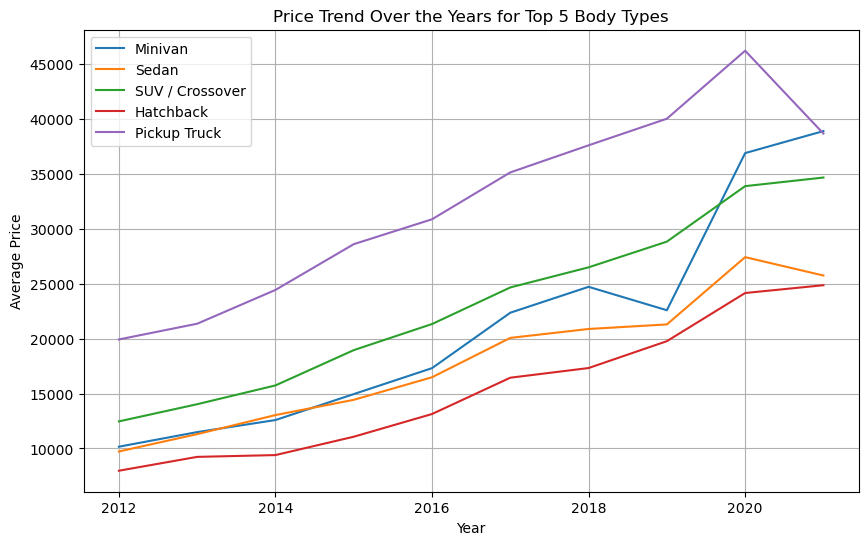

In [60]:
price_trend_df = cleaned_body_type1_df.groupBy('body_type', 'year').avg('price')
price_trend_pd = price_trend_df.toPandas()
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
for body_type in price_trend_pd['body_type'].unique():
    body_type_data = price_trend_pd[price_trend_pd['body_type'] == body_type]
    body_type_data = body_type_data.sort_values('year') 
    plt.plot(body_type_data['year'], body_type_data['avg(price)'], label=body_type)

plt.title('Price Trend Over the Years for Top 5 Body Types')
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.legend()
plt.grid(True)
plt.show()

## ADVANCED ANALYSIS : Identify the city and body_type combination with the highest average city_fuel_economy.

## Exploring the city,body_type and city_fuel_economy columns

In [61]:
cleaned_body_type2_df = cleaned_df.filter(cleaned_df['body_type'].isin(['SUV / Crossover', 'Sedan', 'Pickup Truck', 'Minivan', 'Hatchback', 'Coupe', 'Wagon', 'Convertible', 'Van','Camry']))
cleaned_body_type2_df=cleaned_body_type2_df.select('city','city_fuel_economy','body_type')
cleaned_body_type2_df.show()

+--------+-----------------+---------------+
|    city|city_fuel_economy|      body_type|
+--------+-----------------+---------------+
| Bayamon|             NULL|SUV / Crossover|
|San Juan|             NULL|SUV / Crossover|
|Guaynabo|             17.0|          Sedan|
|San Juan|             NULL|SUV / Crossover|
|San Juan|             NULL|SUV / Crossover|
|San Juan|             NULL|SUV / Crossover|
| Bayamon|             NULL|          Sedan|
|San Juan|             NULL|SUV / Crossover|
|San Juan|             NULL|SUV / Crossover|
|San Juan|             NULL|SUV / Crossover|
|Guaynabo|             NULL|          Coupe|
|San Juan|             NULL|SUV / Crossover|
|Guaynabo|             22.0|          Sedan|
|San Juan|             NULL|SUV / Crossover|
| Bayamon|             NULL|          Sedan|
| Bayamon|             NULL|          Sedan|
|San Juan|             NULL|SUV / Crossover|
|San Juan|             NULL|SUV / Crossover|
|San Juan|             NULL|SUV / Crossover|
|San Juan|

## Cleaning the city_fuel_economy column

In [62]:
from pyspark.sql.functions import col, trim, regexp_replace, when, isnan
cleaned_body_type2_df = cleaned_body_type2_df.withColumn('city_fuel_economy', trim(regexp_replace('city_fuel_economy', r'[^0-9\.]', '')))
cleaned_fuel_economy1 = when(col('city_fuel_economy') != '', col('city_fuel_economy').cast('double')).otherwise(None)
cleaned_body_type2_df = cleaned_body_type2_df.withColumn('city_fuel_economy', cleaned_fuel_economy1)
cleaned_body_type2_df = cleaned_body_type2_df.dropna(subset=['city_fuel_economy'])
cleaned_body_type2_df.show()

+---------+-----------------+---------------+
|     city|city_fuel_economy|      body_type|
+---------+-----------------+---------------+
| Guaynabo|             17.0|          Sedan|
| Guaynabo|             22.0|          Sedan|
|Bay Shore|             27.0|          Sedan|
|    Bronx|             18.0|          Coupe|
|Bay Shore|             18.0|SUV / Crossover|
|Bay Shore|             15.0|SUV / Crossover|
|Bay Shore|             18.0|SUV / Crossover|
|    Bronx|             20.0|SUV / Crossover|
|    Bronx|             27.0|          Coupe|
|    Bronx|             18.0|SUV / Crossover|
|Bay Shore|             18.0|SUV / Crossover|
|Bay Shore|             24.0|SUV / Crossover|
|    Bronx|             23.0|          Sedan|
|    Bronx|             18.0|SUV / Crossover|
|Bay Shore|             18.0|SUV / Crossover|
|Bay Shore|             24.0|SUV / Crossover|
|    Bronx|             16.0|SUV / Crossover|
|    Bronx|             18.0|SUV / Crossover|
|    Bronx|             18.0|SUV /

In [63]:
from pyspark.sql import functions as F
from pyspark.sql.functions import col
quartiles = cleaned_body_type2_df.stat.approxQuantile('city_fuel_economy', [0.25, 0.75], 0.01) 
q1 = quartiles[0]
q3 = quartiles[1]
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
cleaned_body_type2_df = cleaned_body_type2_df.filter((col('city_fuel_economy') >= lower_bound) & (col('city_fuel_economy') <= upper_bound))

In [64]:
min_value = cleaned_body_type2_df.agg(F.min('city_fuel_economy')).collect()[0][0]
max_value = cleaned_body_type2_df.agg(F.max('city_fuel_economy')).collect()[0][0]

print("Minimum value after filtering:", min_value)
print("Maximum value after filtering:", max_value)


Minimum value after filtering: 7.0
Maximum value after filtering: 38.0


In [65]:
number_of_nulls = cleaned_body_type2_df.filter(col('city').isNull()).count()
print(number_of_nulls)

0


## Group city and body type and find average city fuel economy and order it in descending order

In [66]:
avg_df = cleaned_body_type2_df.groupBy('city', 'body_type').avg('city_fuel_economy')
avg_df = avg_df.orderBy(F.desc('avg(city_fuel_economy)'))

highest_average = avg_df.first()

print("The city and body type with the highest average city fuel economy:")
print(highest_average)

The city and body type with the highest average city fuel economy:
Row(city='Otterbein', body_type='Hatchback', avg(city_fuel_economy)=37.0)


In [67]:
avg_df.show()

+---------------+---------+----------------------+
|           city|body_type|avg(city_fuel_economy)|
+---------------+---------+----------------------+
|      Otterbein|Hatchback|                  37.0|
|Clifton Heights|Hatchback|                  37.0|
|        Keyport|Hatchback|                  37.0|
|    Harborcreek|Hatchback|                  37.0|
| Flowery Branch|Hatchback|                  37.0|
|   Natchitoches|Hatchback|                  37.0|
|        Quinlan|Hatchback|                  37.0|
|       Lakeside|Hatchback|                  37.0|
|     Ozone Park|Hatchback|                  36.0|
|        Dunmore|Hatchback|                  36.0|
|   Randallstown|    Wagon|                  36.0|
|         Lisbon|Hatchback|                  36.0|
|       Suitland|    Wagon|                  36.0|
|       Deptford|Hatchback|                  36.0|
|    Millersburg|    Wagon|                  36.0|
|    Bethel Park|Hatchback|                  36.0|
|    Carmichaels|Hatchback|    

## ADVANCED ANALYSIS : Investigate the relationship between back_legroom and body_type using correlation analysis and visualization.

## Filtering and keeping only the valid body types which we found earlier and exploring back_legroom column

In [68]:
cleaned_body_type3_df = cleaned_df.filter(cleaned_df['body_type'].isin(['SUV / Crossover', 'Sedan', 'Pickup Truck', 'Minivan', 'Hatchback', 'Coupe', 'Wagon', 'Convertible', 'Van']))
cleaned_body_type3_df.select('body_type','back_legroom').show()

+---------------+------------+
|      body_type|back_legroom|
+---------------+------------+
|SUV / Crossover|     35.1 in|
|SUV / Crossover|     38.1 in|
|          Sedan|     35.4 in|
|SUV / Crossover|     37.6 in|
|SUV / Crossover|     38.1 in|
|SUV / Crossover|     37.1 in|
|          Sedan|     35.1 in|
|SUV / Crossover|     37.1 in|
|SUV / Crossover|     38.1 in|
|SUV / Crossover|     33.8 in|
|          Coupe|          --|
|SUV / Crossover|     33.8 in|
|          Sedan|     35.1 in|
|SUV / Crossover|     37.1 in|
|          Sedan|     35.1 in|
|          Sedan|     35.1 in|
|SUV / Crossover|     38.1 in|
|SUV / Crossover|     37.1 in|
|SUV / Crossover|     37.1 in|
|SUV / Crossover|     38.1 in|
+---------------+------------+
only showing top 20 rows



In [69]:
cleaned_body_type3_df.select(count(when(col('back_legroom')=='--',True)).alias("null_count")).show()

+----------+
|null_count|
+----------+
|     83457|
+----------+



In [70]:
from pyspark.sql.functions import when,col
cleaned_body_type3_df=cleaned_body_type3_df.withColumn("back_legroom",when(col("back_legroom")=="--",None).otherwise(col("back_legroom")))

In [71]:
cleaned_body_type3_df.select('body_type','back_legroom').show()

+---------------+------------+
|      body_type|back_legroom|
+---------------+------------+
|SUV / Crossover|     35.1 in|
|SUV / Crossover|     38.1 in|
|          Sedan|     35.4 in|
|SUV / Crossover|     37.6 in|
|SUV / Crossover|     38.1 in|
|SUV / Crossover|     37.1 in|
|          Sedan|     35.1 in|
|SUV / Crossover|     37.1 in|
|SUV / Crossover|     38.1 in|
|SUV / Crossover|     33.8 in|
|          Coupe|        NULL|
|SUV / Crossover|     33.8 in|
|          Sedan|     35.1 in|
|SUV / Crossover|     37.1 in|
|          Sedan|     35.1 in|
|          Sedan|     35.1 in|
|SUV / Crossover|     38.1 in|
|SUV / Crossover|     37.1 in|
|SUV / Crossover|     37.1 in|
|SUV / Crossover|     38.1 in|
+---------------+------------+
only showing top 20 rows



## Replaced special characters like -- and in

In [72]:
from pyspark.sql.functions import regexp_replace
cleaned_body_type3_df = cleaned_body_type3_df.withColumn('back_legroom', regexp_replace(cleaned_body_type3_df['back_legroom'], '[^0-9\.]', ''))
cleaned_body_type3_df.select('body_type','back_legroom').show()

+---------------+------------+
|      body_type|back_legroom|
+---------------+------------+
|SUV / Crossover|        35.1|
|SUV / Crossover|        38.1|
|          Sedan|        35.4|
|SUV / Crossover|        37.6|
|SUV / Crossover|        38.1|
|SUV / Crossover|        37.1|
|          Sedan|        35.1|
|SUV / Crossover|        37.1|
|SUV / Crossover|        38.1|
|SUV / Crossover|        33.8|
|          Coupe|        NULL|
|SUV / Crossover|        33.8|
|          Sedan|        35.1|
|SUV / Crossover|        37.1|
|          Sedan|        35.1|
|          Sedan|        35.1|
|SUV / Crossover|        38.1|
|SUV / Crossover|        37.1|
|SUV / Crossover|        37.1|
|SUV / Crossover|        38.1|
+---------------+------------+
only showing top 20 rows



In [73]:
cleaned_body_type3_df.count()

2986497

In [74]:
from pyspark.sql.functions import count, when, col
null_count = cleaned_body_type3_df.select(count(when(col('back_legroom').isNull(), True)).alias('null_count'))
null_count.show()

+----------+
|null_count|
+----------+
|    229227|
+----------+



In [75]:
cleaned_body_type3_df.printSchema()

root
 |-- vin: string (nullable = true)
 |-- back_legroom: string (nullable = true)
 |-- body_type: string (nullable = true)
 |-- city: string (nullable = true)
 |-- city_fuel_economy: string (nullable = true)
 |-- daysonmarket: string (nullable = true)
 |-- dealer_zip: string (nullable = true)
 |-- description: string (nullable = true)
 |-- engine_cylinders: string (nullable = true)
 |-- engine_displacement: string (nullable = true)
 |-- engine_type: string (nullable = true)
 |-- exterior_color: string (nullable = true)
 |-- franchise_dealer: string (nullable = true)
 |-- franchise_make: string (nullable = true)
 |-- front_legroom: string (nullable = true)
 |-- fuel_tank_volume: string (nullable = true)
 |-- fuel_type: string (nullable = true)
 |-- height: string (nullable = true)
 |-- highway_fuel_economy: string (nullable = true)
 |-- horsepower: string (nullable = true)
 |-- interior_color: string (nullable = true)
 |-- is_new: string (nullable = true)
 |-- latitude: string (nullab

## Removing null values and casting type of back_legroom as double

In [76]:
from pyspark.sql.types import DoubleType
cleaned_body_type3_df = cleaned_body_type3_df.withColumn("back_legroom", col("back_legroom").cast(DoubleType()))

In [77]:
cleaned_body_type3_df.printSchema()

root
 |-- vin: string (nullable = true)
 |-- back_legroom: double (nullable = true)
 |-- body_type: string (nullable = true)
 |-- city: string (nullable = true)
 |-- city_fuel_economy: string (nullable = true)
 |-- daysonmarket: string (nullable = true)
 |-- dealer_zip: string (nullable = true)
 |-- description: string (nullable = true)
 |-- engine_cylinders: string (nullable = true)
 |-- engine_displacement: string (nullable = true)
 |-- engine_type: string (nullable = true)
 |-- exterior_color: string (nullable = true)
 |-- franchise_dealer: string (nullable = true)
 |-- franchise_make: string (nullable = true)
 |-- front_legroom: string (nullable = true)
 |-- fuel_tank_volume: string (nullable = true)
 |-- fuel_type: string (nullable = true)
 |-- height: string (nullable = true)
 |-- highway_fuel_economy: string (nullable = true)
 |-- horsepower: string (nullable = true)
 |-- interior_color: string (nullable = true)
 |-- is_new: string (nullable = true)
 |-- latitude: string (nullab

In [78]:
cleaned_body_type3_df = cleaned_body_type3_df.dropna(subset=["back_legroom"])

In [79]:
cleaned_body_type3_df.select('body_type','back_legroom').show()

+---------------+------------+
|      body_type|back_legroom|
+---------------+------------+
|SUV / Crossover|        35.1|
|SUV / Crossover|        38.1|
|          Sedan|        35.4|
|SUV / Crossover|        37.6|
|SUV / Crossover|        38.1|
|SUV / Crossover|        37.1|
|          Sedan|        35.1|
|SUV / Crossover|        37.1|
|SUV / Crossover|        38.1|
|SUV / Crossover|        33.8|
|SUV / Crossover|        33.8|
|          Sedan|        35.1|
|SUV / Crossover|        37.1|
|          Sedan|        35.1|
|          Sedan|        35.1|
|SUV / Crossover|        38.1|
|SUV / Crossover|        37.1|
|SUV / Crossover|        37.1|
|SUV / Crossover|        38.1|
|          Sedan|        35.1|
+---------------+------------+
only showing top 20 rows



## One hot encoding of body_type since its a categorical column

In [80]:
from pyspark.ml.feature import OneHotEncoder, StringIndexer
from pyspark.ml import Pipeline
indexer = StringIndexer(inputCol="body_type", outputCol="body_type_index")
encoder = OneHotEncoder(inputCol="body_type_index", outputCol="body_type_encoded")
pipeline = Pipeline(stages=[indexer, encoder])
model = pipeline.fit(cleaned_body_type3_df)
transformed_df = model.transform(cleaned_body_type3_df)
transformed_df.select('body_type_encoded','back_legroom').show()

+-----------------+------------+
|body_type_encoded|back_legroom|
+-----------------+------------+
|    (8,[0],[1.0])|        35.1|
|    (8,[0],[1.0])|        38.1|
|    (8,[1],[1.0])|        35.4|
|    (8,[0],[1.0])|        37.6|
|    (8,[0],[1.0])|        38.1|
|    (8,[0],[1.0])|        37.1|
|    (8,[1],[1.0])|        35.1|
|    (8,[0],[1.0])|        37.1|
|    (8,[0],[1.0])|        38.1|
|    (8,[0],[1.0])|        33.8|
|    (8,[0],[1.0])|        33.8|
|    (8,[1],[1.0])|        35.1|
|    (8,[0],[1.0])|        37.1|
|    (8,[1],[1.0])|        35.1|
|    (8,[1],[1.0])|        35.1|
|    (8,[0],[1.0])|        38.1|
|    (8,[0],[1.0])|        37.1|
|    (8,[0],[1.0])|        37.1|
|    (8,[0],[1.0])|        38.1|
|    (8,[1],[1.0])|        35.1|
+-----------------+------------+
only showing top 20 rows



In [81]:
distinct_body_types = transformed_df.select('body_type').distinct()
distinct_body_types_list = [row['body_type'] for row in distinct_body_types.collect()]
for body_type in distinct_body_types_list:
    encoding = transformed_df.filter(transformed_df['body_type'] == body_type).select('body_type_encoded').distinct().collect()[0]['body_type_encoded']
    print(f"{body_type}: {encoding}")

Hatchback: (8,[4],[1.0])
Convertible: (8,[7],[1.0])
Sedan: (8,[1],[1.0])
Pickup Truck: (8,[2],[1.0])
Wagon: (8,[6],[1.0])
Van: (8,[],[])
SUV / Crossover: (8,[0],[1.0])
Coupe: (8,[5],[1.0])
Minivan: (8,[3],[1.0])


In [82]:
transformed_df.select('back_legroom').printSchema()

root
 |-- back_legroom: double (nullable = true)



In [86]:
from pyspark.ml.feature import VectorAssembler
selected_features = ['body_type_encoded','back_legroom']
assembler = VectorAssembler(inputCols=selected_features, outputCol="features")
transformed_df_vectorized = assembler.transform(transformed_df.select(selected_features))

## Using pearson correlation to find correlation coefficent

In [87]:
from pyspark.ml.stat import Correlation
pearson_corr_matrix = Correlation.corr(transformed_df_vectorized, "features", method="pearson").head()
pearson_corr_matrix

Row(pearson(features)=DenseMatrix(9, 9, [1.0, -0.586, -0.4121, -0.1693, -0.1685, -0.1429, -0.1109, -0.0715, ..., -0.1711, 0.2743, 0.0341, -0.1672, -0.2822, -0.0267, -0.1664, 1.0], False))

## Converting pearson matrix to array and showing values

In [88]:
corr_values = pearson_corr_matrix[0].toArray()
corr_values

array([[ 1.        , -0.5860448 , -0.41205737, -0.16930856, -0.16845648,
        -0.14291289, -0.11087491, -0.07151058,  0.11426391],
       [-0.5860448 ,  1.        , -0.24552817, -0.10088406, -0.10037634,
        -0.08515596, -0.06606583, -0.04261023, -0.17108953],
       [-0.41205737, -0.24552817,  1.        , -0.07093318, -0.07057619,
        -0.0598745 , -0.04645193, -0.02995993,  0.27427857],
       [-0.16930856, -0.10088406, -0.07093318,  1.        , -0.02899876,
        -0.02460159, -0.01908644, -0.01231011,  0.03410422],
       [-0.16845648, -0.10037634, -0.07057619, -0.02899876,  1.        ,
        -0.02447778, -0.01899039, -0.01224816, -0.16716667],
       [-0.14291289, -0.08515596, -0.0598745 , -0.02460159, -0.02447778,
         1.        , -0.01611081, -0.01039093, -0.28219418],
       [-0.11087491, -0.06606583, -0.04645193, -0.01908644, -0.01899039,
        -0.01611081,  1.        , -0.00806151, -0.02671106],
       [-0.07151058, -0.04261023, -0.02995993, -0.01231011, -0

## Correlation heatmap

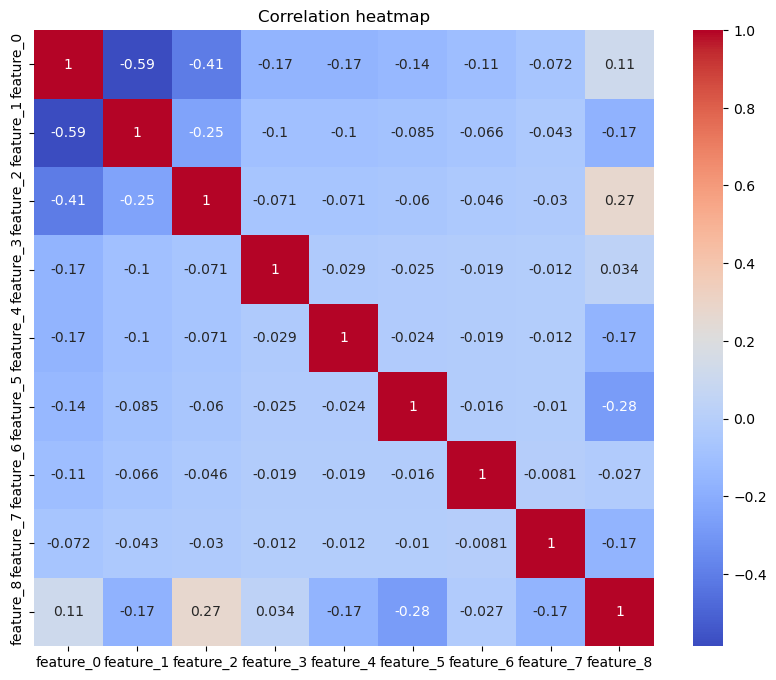

In [91]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
pdf=transformed_df_vectorized.select("features").toPandas()
feature_columns=[f"feature_{i}" for i in range(pdf["features"].apply(len).max())]
pdf=pd.DataFrame(pdf["features"].apply(lambda x:x.toArray()).tolist(),columns=feature_columns)
plt.figure(figsize=(10,8))
sns.heatmap(pdf.corr(),annot=True,cmap="coolwarm")
plt.title("Correlation heatmap")
plt.show()

## MACHINE LEARNING :  Utilize regression in MlLib to predict prices of cars based on the available features in the dataset.

## Cleaning mileage 

In [92]:
cleaned_body_type1_df.select('mileage').distinct().show()

+--------+
| mileage|
+--------+
| 16553.0|
| 52528.0|
| 44864.0|
| 86300.0|
| 15141.0|
|100775.0|
| 64735.0|
|103845.0|
|  1008.0|
| 75718.0|
| 32267.0|
| 97592.0|
|  7665.0|
| 84538.0|
| 48259.0|
| 65102.0|
|  9984.0|
| 43227.0|
| 25885.0|
|   886.0|
+--------+
only showing top 20 rows



In [93]:
from pyspark.sql.types import IntegerType
cleaned_body_type1_df=cleaned_body_type1_df.dropna(subset=['mileage'])
cleaned_body_type1_df=cleaned_body_type1_df.withColumn("mileage",col("mileage").cast(IntegerType()))

In [94]:
cleaned_body_type1_df.select('mileage').printSchema()

root
 |-- mileage: integer (nullable = true)



In [95]:
from pyspark.sql import functions as F
from pyspark.sql.functions import col
cleaned_body_type1_df=cleaned_body_type1_df.withColumn("mileage",col("mileage").cast("int"))
quartiles = cleaned_body_type1_df.stat.approxQuantile('mileage', [0.25, 0.75], 0.01) 
q1 = quartiles[0]
q3 = quartiles[1]
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
outliers = cleaned_body_type1_df.filter((col('mileage')< lower_bound) | (col('mileage') > upper_bound))
outliers.select('mileage').show()

+-------+
|mileage|
+-------+
| 108538|
| 120996|
| 101415|
|  99362|
| 115477|
| 140798|
| 101681|
| 112336|
|  99896|
| 123642|
| 107609|
| 126199|
| 110255|
| 106911|
| 133298|
| 117572|
| 177088|
| 129692|
| 109851|
| 133877|
+-------+
only showing top 20 rows



## Had first tried to build a model using 2 features-mileage and year

In [96]:
from pyspark.ml.feature import VectorAssembler
vectorAssembler = VectorAssembler(inputCols = ['mileage','year'], outputCol = 'features')
vhouse_df = vectorAssembler.transform(cleaned_body_type1_df)
vhouse_df = vhouse_df.select(['features', 'price'])
vhouse_df.show(3)

+------------+-------+
|    features|  price|
+------------+-------+
|[7.0,2019.0]|23141.0|
|[8.0,2020.0]|46500.0|
|[7.0,2020.0]|48880.0|
+------------+-------+
only showing top 3 rows



In [97]:
splits = vhouse_df.randomSplit([0.7, 0.3])
train_df = splits[0]
test_df = splits[1]